In [ ]:
'''
Code copied from this source as recommended by Ebay official since current version of scikit-learn does not have pair confusion matrix
https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/cluster/_supervised.py
'''
import numpy as np
from sklearn.metrics.cluster._supervised import contingency_matrix, check_clusterings
def pair_confusion_matrix(labels_true, labels_pred):
    """Pair confusion matrix arising from two clusterings.
    The pair confusion matrix :math:`C` computes a 2 by 2 similarity matrix
    between two clusterings by considering all pairs of samples and counting
    pairs that are assigned into the same or into different clusters under
    the true and predicted clusterings.
    Considering a pair of samples that is clustered together a positive pair,
    then as in binary classification the count of true negatives is
    :math:`C_{00}`, false negatives is :math:`C_{10}`, true positives is
    :math:`C_{11}` and false positives is :math:`C_{01}`.
    Read more in the :ref:`User Guide <pair_confusion_matrix>`.
    Parameters
    ----------
    labels_true : array-like of shape (n_samples,), dtype=integral
        Ground truth class labels to be used as a reference.
    labels_pred : array-like of shape (n_samples,), dtype=integral
        Cluster labels to evaluate.
    Returns
    -------
    C : ndarray of shape (2, 2), dtype=np.int64
        The contingency matrix.
    See Also
    --------
    rand_score: Rand Score
    adjusted_rand_score: Adjusted Rand Score
    adjusted_mutual_info_score: Adjusted Mutual Information
    Examples
    --------
    Perfectly matching labelings have all non-zero entries on the
    diagonal regardless of actual label values:
      >>> from sklearn.metrics.cluster import pair_confusion_matrix
      >>> pair_confusion_matrix([0, 0, 1, 1], [1, 1, 0, 0])
      array([[8, 0],
             [0, 4]]...
    Labelings that assign all classes members to the same clusters
    are complete but may be not always pure, hence penalized, and
    have some off-diagonal non-zero entries:
      >>> pair_confusion_matrix([0, 0, 1, 2], [0, 0, 1, 1])
      array([[8, 2],
             [0, 2]]...
    Note that the matrix is not symmetric.
    References
    ----------
    .. L. Hubert and P. Arabie, Comparing Partitions, Journal of
      Classification 1985
      https://link.springer.com/article/10.1007%2FBF01908075
    """
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples = np.int64(labels_true.shape[0])

    # Computation using the contingency data
    contingency = contingency_matrix(
        labels_true, labels_pred, sparse=True
        )#, dtype=np.int64)
    n_c = np.ravel(contingency.sum(axis=1))
    n_k = np.ravel(contingency.sum(axis=0))
    sum_squares = (contingency.data ** 2).sum()
    C = np.empty((2, 2), dtype=np.int64)
    C[1, 1] = sum_squares - n_samples
    C[0, 1] = contingency.dot(n_k).sum() - sum_squares
    C[1, 0] = contingency.transpose().dot(n_c).sum() - sum_squares
    C[0, 0] = n_samples ** 2 - C[0, 1] - C[1, 0] - sum_squares
    return C

# Pre-Processing Data

In [ ]:
import pandas as pd
akshit_df = './mlchallenge_set_2021.tsv'
akshit_valid = './mlchallenge_set_validation.tsv'
sam_df = 'C:/Users/sjmal/OneDrive/Desktop/ML/2021/mlchallenge_set_2021_edited.txt'
sam_valid = 'C:/Users/sjmal/OneDrive/Desktop/ML/2021/mlchallenge_set_validation.tsv'
#SA_valid=pd.read_table('/Users/shivankagrawal/Documents/ebay/mlchallenge_set_validation.tsv',header=None)
#SA_df=pd.read_table('/Users/shivankagrawal/Documents/ebay/mlchallenge_set_2021.tsv',header=None)
df=pd.read_table(sam_df)
valid=pd.read_table(sam_valid)
#df = pd.read_table(akshit_df)
#valid = pd.read_table(akshit_valid,sep='\t')
#SA_valid = valid
#SA_df = df
df.columns=['category','primary_image_url','All Links','Tags','index']
valid.columns=['ID', 'Group']
valid.set_index('ID', inplace=True)

In [41]:
"""
Import test output file as dataframe and set the index.
"""
output = './akshit.tsv'
predictions = pd.read_table(output,header=None)
predictions.columns = ['ID', 'Group']
predictions.set_index('ID', inplace=True)
predictions = predictions.drop(index='ID')

In [39]:
print(predictions)
print(valid)

Empty DataFrame
Columns: [Group]
Index: []
           Group
ID              
163      2000001
194      2000003
251      2000004
315      2000006
321      2000007
...          ...
1005727  2005995
1005824  2005998
1005835  2005999
1005892  2006000
1005927  2005224

[12443 rows x 1 columns]


In [43]:
"""
Compute confusion matrix for validation data. Use valid dataframe to extract values from a tsv output file.
"""
'''
preds = []
actuals = []
for index, row in valid.iterrows():
    preds.append(predictions.loc[index]['Group'])
    actuals.append(row['Group'])
# print(preds[100:200])
# print(actuals[100:200])
'''
def evaluate(actuals, preds):
    C = pair_confusion_matrix(actuals, preds)
    precision = C[1][1] / (C[1][1] + C[0][1]) # (true positives) / (true positives + false positives)
    recall = C[1][1] / (C[1][1] + C[1][0]) # (true positives) / (true positives + false negatives)
    print(f'Confusion Matrix:\n{C}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'f1 score: {2 * precision * recall / (precision + recall)}')

evaluate(actuals, preds)

Confusion Matrix:
[[0 0]
 [0 0]]
precision: nan
recall: nan
f1 score: nan


<ipython-input-43-6223e19ae205>:15: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = C[1][1] / (C[1][1] + C[0][1]) # (true positives) / (true positives + false positives)
<ipython-input-43-6223e19ae205>:16: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = C[1][1] / (C[1][1] + C[1][0]) # (true positives) / (true positives + false negatives)


In [ ]:
print(df.head())
print(valid.head())

In [ ]:
#split links into list (for now only does first 100)
i = 0
for link in df['All Links'][0:100]:
    df['All Links'][i] = link.split(';')
    i+=1
print(df['All Links'][0:100])

In [11]:
"""
Frequency counting of the tags in a particular category.
"""
import re
from collections import Counter
# for category in range(1, 6):
#df = SA_df
df = df.loc[df['category'] == 5]
freq=Counter()
attribute=[['']]*len(df)
print('allocated array')
trialrange=len(df)
for x in range(0, trialrange, 5):#range(int(len(df)/10)):#len(df)
    attribute[x]=df.iloc[x,3].lower()
    attribute[x] = attribute[x][1:-1] # remove starting and ending parentheses
    attribute[x] = re.split(r',(?![^(]*\))', attribute[x]) # ignore commas that are inside parentheses
    attribute[x] = [a.split(':') for a in attribute[x]]
    freq+=Counter([i[0] for i in attribute[x]])
    tempdict={}
#     print(df.iloc[x,3])
    #print(attribute[x])
#     print(attribute)
    for i in attribute[x]:
        try:
            tempdict[i[0]]=float(i[1])
        except:
            try:
                tempdict[i[0]]=i[1]
            except:
                pass
    attribute[x]=tempdict
#     print(attribute[x])
df = SA_df
print("am out of loop")

allocated array
am out of loop


{'brand': 6078, 'mpn': 5245, 'model': 2939, 'type': 2560, 'upc': 2189, 'ean': 1605, 'cord type': 1498, 'bagged/bagless': 1341, 'color': 1285, 'filters': 1020, 'features': 1018, 'manufacturer': 887, 'isbn': 823, 'country/region of manufacture': 634, 'custom bundle': 612, 'modified item': 532, 'item weight': 487, 'shipping weight': 470, 'power': 456, 'product dimensions': 397, '': 353, 'item model number': 341, 'voltage': 294, 'non-domestic product': 256, 'productgroup': 253, 'included accessories': 233, 'binding': 232, 'label': 227, 'publisher': 215, 'bag/bagless': 211, 'shipping': 180, 'item_length': 179, 'weight': 170, 'manufacturer part number': 167, 'edge cleaning': 166, 'item_width': 163, 'partnumber': 162, 'size': 156, 'category': 154, 'tax': 154, 'style': 148, 'filter type': 147, 'batteries': 139, 'handle controls': 130, 'bundle listing': 120, 'numberofitems': 117, 'color family': 117, 'amperage (amps)': 111, 'carpet cleaning': 110, 'package dimensions': 104, 'model number': 104,

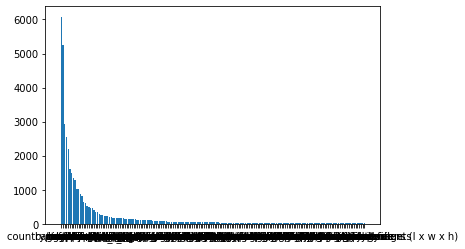

In [44]:
d = dict((k, v) for k, v in freq.items() if v > 20)
array = list(sorted(d, key=lambda k: d[k],reverse=True))[:10]
d= {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
print(d)
print(array)
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
plt.bar(d.keys(),d.values())
plt.show()

In [ ]:
df = SA_df

In [114]:
import re
validation_rows = df.loc[df['index'].isin(valid.index)]
validation_rows = validation_rows.loc[validation_rows['category'] == 1]
c1_rows = df.loc[df['category'] == 1]
c1_indices = c1_rows.copy()
c1_indices.set_index('index', inplace=True)
c2_rows = df.loc[df['category'] == 2]
c2_indices = c2_rows.copy()
c2_indices.set_index('index', inplace=True)
c3_rows = df.loc[df['category'] == 3]
c3_indices = c3_rows.copy()
c3_indices.set_index('index', inplace=True)
c4_rows = df.loc[df['category'] == 4]
c4_indices = c4_rows.copy()
c4_indices.set_index('index', inplace=True)
c5_rows = df.loc[df['category'] == 5]
c5_indices = c5_rows.copy()
c5_indices.set_index('index', inplace=True)
print(len(c5_rows))
keep_tags = ['brand', 'size type', "bottoms size (women's)", 'material', 'inseam', 'color', 'rise', 'style', 'silhouette', 'country/region of manufacture']
keep_tags =  ['brand', 'style', "us shoe size (men's)", 'color', 'product line', 'model', 'width', 'euro size', 'country/region of manufacture', 'upper material']
keep_tags = ['brand', 'material', 'type', 'pattern', 'model', 'country/region of origin', 'mpn', 'country/region of manufacture', 'handle material', 'number of settings','color']
#keep_tags =  ['brand', 'color', 'material', 'type', 'mpn', 'pattern', 'bed size', 'size', 'country/region of manufacture', 'style']
#keep_tags = ['brand', 'mpn', 'model', 'type', 'upc', 'ean', 'cord type', 'bagged/bagless', 'color', 'filters']
# df = category5
def register_attributes(attribute, all_attributes):
    attribute = attribute[1:-1].lower() # attribute = re.sub(r'[()]','', attribute)
    attribute = re.split(r',(?![^(]*\))', attribute)
    attribute = [a.split(':') for a in attribute]
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        if attribute[i][0] in keep_tags:
            all_attributes.add(attribute[i][0])
    #print(f'atttribute is: {attribute}')
    mapping = {}
    #for i in range(len(attribute) - 1):
    #    if i == len(attribute) - 2:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:]
    #    else:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return(attribute)

def map_attributes(attribute, num_attributes, index_to_attr):
    attribute = attribute[1:-1].lower() # attribute = re.sub(r'[()]','', attribute)
    attribute = re.split(r',(?![^(]*\))', attribute)
    attribute = [a.split(':') for a in attribute]
    all_attributes_for_row = [None] * num_attributes
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        #print(f'index: {attr_to_index[attribute[i][0]]}')
        if len(attribute[i]) > 1 and attribute[i][0] in keep_tags:
            all_attributes_for_row[attr_to_index[attribute[i][0]]] = attribute[i][1]
    mapping = {}
    #for i in range(len(attribute) - 1):
    #    if i == len(attribute) - 2:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:]
    #    else:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return all_attributes_for_row
m = 2000
all_attributes = set()
all_maps = []
for index,row in c2_rows[0:].iterrows():
    register_attributes(row['Tags'], all_attributes)

all_attributes = list(all_attributes)
attr_to_index = {all_attributes[i]: i for i in range(len(all_attributes))}
#print(attr_to_index)
#print(f'numAttributes: {len(all_attributes)}')

for index,row in c2_rows[0:].iterrows():
    all_maps.append(map_attributes(row['Tags'], len(all_attributes), attr_to_index))
possible_vals = set()
from collections import Counter
c = Counter()
for v in all_maps:
    possible_vals.update(v)
    c.update(v)
print(len(possible_vals))
print(c)

34531
23042
Counter({None: 215506, 'does not apply': 17639, 'bagless': 5205, 'corded': 4255, 'cordless': 3271, 'upright': 2763, 'bagged': 2209, 'robotic': 2113, 'handheld': 2060, 'unbranded': 1829, 'hepa': 1737, 'dyson': 1548, 'bissell': 1460, 'shark': 1459, 'black': 1317, 'washable': 1058, 'stick': 946, 'wet/dry': 944, 'hoover': 907, 'dirt devil': 871, 'canister/cylinder': 830, 'eureka': 770, 'black+decker': 712, 'irobot': 651, 'ridgid': 628, 'na': 551, 'red': 541, 'white': 485, 'shop-vac': 476, 'kirby': 470, 'kenmore': 453, 'blue': 430, 'oreck': 427, 'ecovacs': 390, 'car': 378, 'miele': 361, 'canister': 360, 'electrolux': 316, 'not applicable': 300, 'rainbow': 281, 'vacmaster': 279, 'ryobi': 278, 'cyclone': 259, 'samsung': 258, 'sanitaire': 256, 'black & decker': 232, 'roomba': 212, 'gray': 209, 'makita': 201, 'bobsweep': 197, 'stanley': 188, 'eufy': 184, 'craftsman': 184, 'holife': 177, 'central system': 177, 'proteam': 173, 'unbranded/generic': 167, 'milwaukee': 166, 'other': 166, 

# CNN to One Hot Encoder

In [117]:
#dataframe with attribute values
#print(type(all_maps))
categories = pd.DataFrame(all_maps)
categories.columns=all_attributes
#print(categories)

In [118]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x = oh.fit_transform(categories.astype(str))
x=x.toarray()
print(x)#[0][440:450])
print(type(x))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


In [119]:
colorind=all_attributes.index('color')
temp=list(oh.categories_[colorind])#[1339]
simple_colors = {'black':0,'white':0,'red':0,'blue':0,'green':0,'yellow':0,'brown':0,'purple':0,'pink':0,'gray':0,'grey':0}

for key in simple_colors.keys():
    try:
        simple_colors[key]=temp.index(key)
    except:
        print(key)
print(simple_colors)

{'black': 72, 'white': 619, 'red': 476, 'blue': 132, 'green': 287, 'yellow': 653, 'brown': 157, 'purple': 462, 'pink': 443, 'gray': 268, 'grey': 299}


In [120]:
from ast import literal_eval
maxind=x.shape[0]
ii = 0
repeats = {}
for filenum in range(1,69): #later change 3 to 69
    cnn=pd.read_csv('CNN predictions/predictions'+str(filenum)+'.csv',index_col=0)
    si = len(cnn)
    print(filenum)
    for i in range(si): #change 5 to si
        ind=cnn.iloc[i].loc['ID'] # get id of ith row
        #print(ind)
        if ind in c5_indices.index and ind not in repeats:
            repeats[ind] = 1
            colortup=cnn.iloc[i].loc['Predictions']
            colortup=colortup[1:-1]
            colortup=literal_eval(colortup)
            for y in colortup:
                #print(y)
                #x_index = c5_rows.loc[c5_rows['index'] == ind].index
                #print(c5_rows['index'])
                #print(c5_rows.loc[c5_rows['index']==ind])
                #print(c5_rows.loc[c5_rows['index']==ind].index)
                #print(x_index)
                #print('next')
                #print(simple_colors[y[0]])
                #print(len(c5_rows))
                #print(x[x_index])
                
                x[ii][simple_colors[y[0]]]=y[1]
            ii+=1
                #insert y[1] at onehotencoder matrix (ind,simple_color[y[0]])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


In [88]:
'''#does not work
from numpy import savetxt
savetxt('onehot.csv', x, delimiter=',')
'''

"#does not work\nfrom numpy import savetxt\nsavetxt('onehot.csv', x, delimiter=',')\n"

In [ ]:
c5_rows.head()
#categories.head()

In [121]:
from scipy import sparse
x=sparse.csr_matrix(x)
print(x)

  (0, 72)	0.0020176885
  (0, 132)	0.0019982634
  (0, 157)	4.532518e-05
  (0, 287)	1.6406178e-05
  (0, 299)	0.00085535395
  (0, 443)	4.6108198e-05
  (0, 462)	8.050455e-06
  (0, 476)	1.7433269e-05
  (0, 619)	0.9949243
  (0, 653)	7.106972e-05
  (0, 5063)	1.0
  (0, 5092)	1.0
  (0, 5856)	1.0
  (0, 8950)	1.0
  (0, 14154)	1.0
  (0, 14256)	1.0
  (0, 16824)	1.0
  (0, 17049)	1.0
  (0, 21131)	1.0
  (0, 22454)	1.0
  (1, 72)	0.01366764
  (1, 132)	0.00017514
  (1, 157)	2.1593908e-06
  (1, 287)	3.131819e-06
  (1, 299)	0.91257614
  :	:
  (34528, 14256)	1.0
  (34528, 16839)	1.0
  (34528, 16922)	1.0
  (34528, 21131)	1.0
  (34528, 22454)	1.0
  (34529, 5063)	1.0
  (34529, 5092)	1.0
  (34529, 5856)	1.0
  (34529, 9017)	1.0
  (34529, 14154)	1.0
  (34529, 14849)	1.0
  (34529, 16824)	1.0
  (34529, 16922)	1.0
  (34529, 21131)	1.0
  (34529, 22454)	1.0
  (34530, 5063)	1.0
  (34530, 5092)	1.0
  (34530, 5856)	1.0
  (34530, 10164)	1.0
  (34530, 14154)	1.0
  (34530, 16564)	1.0
  (34530, 16824)	1.0
  (34530, 16922)	1.

# K-Means: Big Picture Clustering

In [ ]:
print(c5_rows.head())

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, random_state=0,verbose=True, n_init=1, max_iter = 15).fit(x)

Initialization complete
Iteration 0, inertia 167658.40520722652
Iteration 1, inertia 112490.46043374835
Iteration 2, inertia 107723.39617465547
Iteration 3, inertia 106324.3489722424
Iteration 4, inertia 105650.849566057
Iteration 5, inertia 105211.2265962905
Iteration 6, inertia 104959.20556503745
Iteration 7, inertia 104730.06941735846
Iteration 8, inertia 104591.84256785642
Iteration 9, inertia 104440.69908988866
Iteration 10, inertia 104329.90069665987
Iteration 11, inertia 104280.37243380003
Iteration 12, inertia 104234.5352285117
Iteration 13, inertia 104180.59241417889
Iteration 14, inertia 104138.43689639175


In [ ]:
count = {}
for i, label in enumerate(kmeans.labels_):
    if label not in count:
        count[label] = 0
    count[label] += 1
print(count)
print(list(sorted(count.values()))[-1:-10:-1])

In [ ]:
# reduce size of k means clusters that are too large
THRESH = 1000
labels = kmeans.labels_
count_so_far = max(labels)
for label in count:
    if count[label] > THRESH:
        # run k-means again
        indices = [i for i in range(x.shape[0]) if labels[i] == label]
        items = np.array([x[i] for i in indices])# get items matching the label
        km = KMeans(n_clusters=20, random_state=0,verbose=True, n_init=1, max_iter = 15).fit(items)
        for km_index, i in enumerate(indices):
            labels[i] = km.labels_[km_index] + count_so_far
        count_so_far = max(labels)

In [123]:
"""
Analysis of K-Means output
"""
preds = []
actuals = []
for i, label in enumerate(kmeans.labels_):
    ID = c5_rows.iloc[i]['index']
    if ID in valid.index:
        preds.append(label)
        actual = valid.loc[ID]['Group']
        actuals.append(actual)
#     print(f'ID: {ID}, pred: {label}, actual: {actual}')
print(count)
print(kmeans.inertia_)
print(len(preds))

evaluate(actuals, preds)

{0: 511, 18: 716, 33: 514, 66: 714, 171: 92, 45: 53, 87: 57, 120: 53, 68: 177, 130: 231, 154: 105, 146: 653, 177: 351, 56: 109, 31: 271, 188: 116, 14: 156, 90: 135, 40: 88, 81: 603, 178: 443, 144: 118, 22: 257, 35: 249, 107: 241, 156: 60, 114: 56, 153: 136, 123: 130, 73: 191, 191: 116, 1: 122, 30: 285, 4: 133, 93: 354, 140: 66, 69: 283, 110: 223, 42: 162, 17: 51, 126: 96, 9: 102, 20: 381, 183: 115, 51: 44, 150: 151, 148: 109, 157: 463, 2: 476, 88: 88, 28: 71, 164: 167, 151: 89, 53: 73, 172: 36, 117: 121, 180: 742, 38: 180, 131: 197, 134: 755, 158: 96, 46: 190, 12: 105, 48: 492, 160: 303, 13: 111, 52: 120, 71: 74, 55: 519, 62: 122, 15: 195, 174: 122, 139: 82, 80: 318, 152: 202, 128: 113, 147: 92, 47: 66, 50: 152, 43: 219, 108: 248, 168: 52, 197: 264, 79: 662, 10: 166, 91: 139, 74: 185, 57: 87, 25: 202, 198: 155, 29: 206, 119: 74, 27: 495, 173: 72, 113: 122, 121: 69, 63: 110, 143: 262, 167: 150, 194: 94, 89: 97, 24: 246, 181: 132, 92: 128, 7: 240, 54: 205, 111: 112, 184: 319, 129: 96, 13

# Aggloromative: Granualar Clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering

def cluster(data):
    clustering = AgglomerativeClustering(compute_distances=True,compute_full_tree = True,distance_threshold = 0.1,n_clusters=None).fit(data)
    print(clustering)
#     print("LABELS")
#     print(clustering.labels_)
#     print(len(clustering.labels_))
#     print(len(set(clustering.labels_)))
#     print("DISTAnCES")
#     print(clustering.distances_)
#     print("num connected components")
#     print(clustering.n_connected_components_)
    # make this better
    # make this work on the entire dataset
    # fix nonetypes
    # don't punish missing attributes, but punish conflicts. how do we encode this?

    return clustering

In [125]:
x = x.toarray() # only run this once

In [ ]:
# x *= 10
x

In [126]:
full_clustering = [0] * len(x)
count_so_far = 0
for label in count:
    indices = [i for i in range(x.shape[0]) if labels[i] == label]
    data = [x[i] for i in indices]
    print(f'now clustering group {label} which has {len(data)} items')
    c = cluster(data)
    for i, label in enumerate(c.labels_):
        full_clustering[indices[i]] = label + count_so_far
#     print(c.labels_)
    count_so_far += len(data)

now clustering group 0 which has 511 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 18 which has 716 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 33 which has 514 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 66 which has 714 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 171 which has 92 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 45 which has 53 items
AgglomerativeClustering(compute_distances=True, compu

In [127]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-127-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
groups = {}
for i, label in enumerate(full_clustering):
    if label not in groups:
        groups[label] = []
    groups[label].append(i)
groups = {label: groups[label] for label in groups if len(groups[label]) > 1}
print(groups)
for label in groups:
    print(f'GROUP: {label}')
    for item in groups[label]:
        print(validation_rows['Tags'].iloc[[item]].to_string())
    print('-----------------')

In [ ]:
print(len(groups))

In [128]:
"""
Evaluate clustering after it has gone through k-means and agglomorative clustering.
"""
preds = []
p = full_clustering
print(full_clustering)
actuals = []
for i in range(len(p)):
    ID = c5_rows.iloc[i]['index']
    if ID in valid.index:
        preds.append(p[i])
        actual = valid.loc[ID]['Group']
        actuals.append(actual)
a = actuals # valid['Group'].tolist()

print(len(set(p)))
print(len(p))
evaluate(a, preds)

[175, 558, 1564, 2345, 2333, 2517, 2573, 2648, 2693, 2843, 3113, 205, 3207, 3835, 4215, 4323, 1620, 4591, 4716, 4833, 3836, 46, 4964, 4479, 5068, 5113, 1665, 5002, 2182, 5085, 4208, 4169, 6084, 6251, 6498, 6741, 6775, 7070, 4804, 4978, 7118, 3780, 5082, 7246, 6249, 7344, 5125, 7557, 7667, 7813, 7069, 7993, 2420, 4874, 8109, 8529, 5074, 8655, 8883, 9072, 9251, 9375, 3004, 9460, 2138, 9539, 9828, 7232, 10068, 10102, 10206, 526, 49, 7663, 10373, 10759, 11285, 4191, 11395, 8109, 11471, 11589, 10268, 4284, 11646, 11774, 11829, 8652, 11946, 12326, 12849, 6740, 12983, 13439, 2823, 13930, 13967, 4063, 14178, 11738, 5066, 14628, 14879, 15083, 10258, 8421, 15216, 15307, 15681, 15968, 4984, 16099, 16146, 14642, 5159, 16229, 2841, 5120, 8936, 8523, 16331, 16345, 2683, 9775, 6035, 16622, 4103, 7251, 199, 16838, 2540, 16948, 17082, 17145, 16379, 1534, 10734, 17256, 2334, 3090, 17433, 17735, 17003, 17079, 4879, 17804, 17979, 18031, 18015, 18051, 17993, 18048, 17999, 18034, 8040, 3031, 4509, 18132, 73

In [129]:
with open('c5.csv', 'w') as w:
    w.write('ID,Group')
    for i, group in enumerate(full_clustering):
        ID = c5_rows.iloc[i]['index']
        w.write(f"{ID},{group}\n")

In [55]:
max(full_clustering)

42865

In [ ]:
"""
Functions used to display the tags in a nicer manner below.
"""
def get_mapping(attribute):
    attribute = re.sub(r'[()]','', attribute)
#     attribute = re.split(r',', attribute)
#     attribute = [a.split(':') for a in attribute]
    attribute = re.split(r':+', attribute)
    attribute = [a.split(',') for a in attribute]
    '''
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        all_attributes.add(attribute[i][0])
    #print(f'atttribute is: {attribute}')
    '''
    mapping = {}
    for i in range(len(attribute) - 1):
        if i == len(attribute) - 2:
            mapping[attribute[i][-1]] = attribute[i + 1][:]
        else:
            mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return mapping

def mapping_to_string(mapping):
    keys = list(mapping.keys())
    keys.sort()
    return ';'.join([f'{key}:{list(sorted(mapping[key]))}' for key in keys])

In [ ]:
"""
Show the items where the two clusterings ,p(redict) and a(ctual), differ.
"""
for i in range(len(a)):
    for j in range(len(p)):
        if i != j:
            if a[i] == a[j] and p[i] != p[j]:
                print("These two items should be in the same group:")
            elif a[i] != a[j] and p[i] == p[j]:
                continue
                print("These two items should not be in the same group")
            else:
                continue
            print(f"tags: {mapping_to_string(get_mapping(validation_rows['Tags'].iloc[[i]].to_string(index=False)))}")
            print(f"urls: {validation_rows['primary_image_url'].iloc[[i]].to_string()}")
            print(f"tags: {mapping_to_string(get_mapping(validation_rows['Tags'].iloc[[j]].to_string(index=False)))}")
            print(f"urls: {validation_rows['primary_image_url'].iloc[[j]].to_string()}")
            print('-------------------')

In [ ]:
old_clustering = full_clustering
print(old_clustering)

In [ ]:
%matplotlib qt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    #response = requests.get(url)
    #img = Image.open(BytesIO(response.content))
    link_labels = [df['Tags'][i] for i in clustering.labels_]
    dendrogram(linkage_matrix, labels = link_labels)
plot_dendrogram(clustering)
plt.show()

In [ ]:
import re
from collections import Counter
freq=Counter()
attribute=[['']]*len(df)
trialrange=5000
for x in range(trialrange):#range(int(len(df)/10)):#len(df)
    attribute[x]=df.iloc[x,3].lower()
    attribute[x] = re.sub(r'[()]','', attribute[x])
    attribute[x] = re.split(r',', attribute[x])
    attribute[x] = [a.split(':') for a in attribute[x]]
    freq+=Counter([i[0] for i in attribute[x]])
    tempdict={}
    for i in attribute[x]:

            try:
                tempdict[i[0]]=float(i[1])
            except:
                try:
                    tempdict[i[0]]=i[1]
                except:
                    pass
    attribute[x]=tempdict

df['seg']=attribute
#print(df['seg'])